In [ ]:
#Library
import pandas as pd
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats


from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB


import math
from math import sqrt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [1965]:
#Load the data
data_original = pd.read_csv("african_crises.csv")
data_original.iloc[:,4:].describe()

,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crisis,inflation_crisis
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [1961]:
#Back up data
df = data_original


# Question 1: Undertake a suitable exploratory analysis of the data explaining each of the variables. Do all the variables make sense? Are there any outliers?

In [1283]:
#Check missing information
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crisis,inflation_crisis
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [1284]:
def dummy_replace(status):
    if status == "crisis":
        return 1
    else:
        return 0

In [1285]:
# Replace by 1 (crisis) and 0 (no crisis)
df["banking_crisis"] = df["banking_crisis"].apply(dummy_replace)
df['currency_crisis'].replace(2,1, inplace = True)

In [1377]:
z = df[df['country'] == "Algeria"]
z["year"][4]

1874

In [1323]:
#Function to calculate IQR
def calculate_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    print('Q1: ', Q1)
    print('Q3: ', Q3)
    print('IQR: ', IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [1318]:
upper_bound_inflation

25.980876498249998

In [1326]:
# Calculate lower bound and upper bound
lower_bound_exch_usd, upper_bound_exch_usd = calculate_iqr(df['exch_usd'])
lower_bound_inflation, upper_bound_inflation = calculate_iqr(df['inflation_annual_cpi'])
lower_bound_gdp_default, upper_bound_gdp_default = calculate_iqr(df['gdp_weighted_default'])


Q1:  0.19535000000000002
Q3:  8.46275
IQR:  8.2674
Q1:  2.0861622595
Q3:  11.644047955
IQR:  9.5578856955
Q1:  0.0
Q3:  0.0
IQR:  0.0


In [1289]:
#Estimate number of outliers of inflation_annual_cpi
outliers = df["inflation_annual_cpi"][(df['inflation_annual_cpi'] < lower_bound_exch_usd) | (df['inflation_annual_cpi'] > upper_bound_exch_usd)]
print('Number of outlineders in inflation_annual_cpi: ', outliers.count())

#Estimate number of outliers of exch_usd
outliers = df["exch_usd"][(df['exch_usd'] < lower_bound_inflation) | (df['exch_usd'] > upper_bound_inflation)]
print('Number of outlineders in exch_usd: ', outliers.count())

#Estimate number of outliers of gdp_weighted_default
outliers = df["gdp_weighted_default"][(df['gdp_weighted_default'] < lower_bound_gdp_default) | (df['gdp_weighted_default'] > upper_bound_gdp_default)]
print('Number of outlineders in gdp_weighted_default: ', outliers.count())

Number of outlineders in inflation_annual_cpi:  142
Number of outlineders in exch_usd:  200
Number of outlineders in gdp_weighted_default:  30


/var/folders/y6/182wld891cn8s93gftsfv4nr0000gn/T/ipykernel_6296/3710873651.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


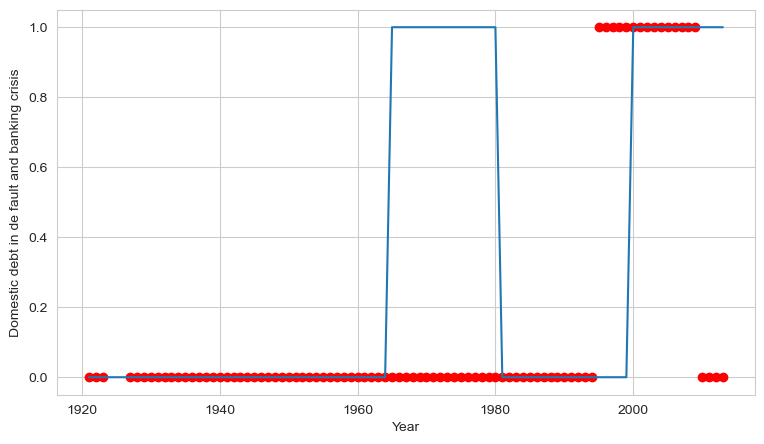

In [2046]:
sns.set_style('whitegrid')
plt.figure(figsize = (9,5))

sns.lineplot(
    x = 'year', y = 'domestic_debt_in_default', 
    hue = None,
    data = df[df['country'] == "Zimbabwe"], palette = 'colorblind'
)
colors = "red"
plt.scatter(
    x = 'year', y = 'banking_crisis', 
    c=colors,
    data = df[df['country'] == "Zimbabwe"]
)
plt.xlabel('Year')
plt.ylabel('Domestic debt in de fault and banking crisis')
display()

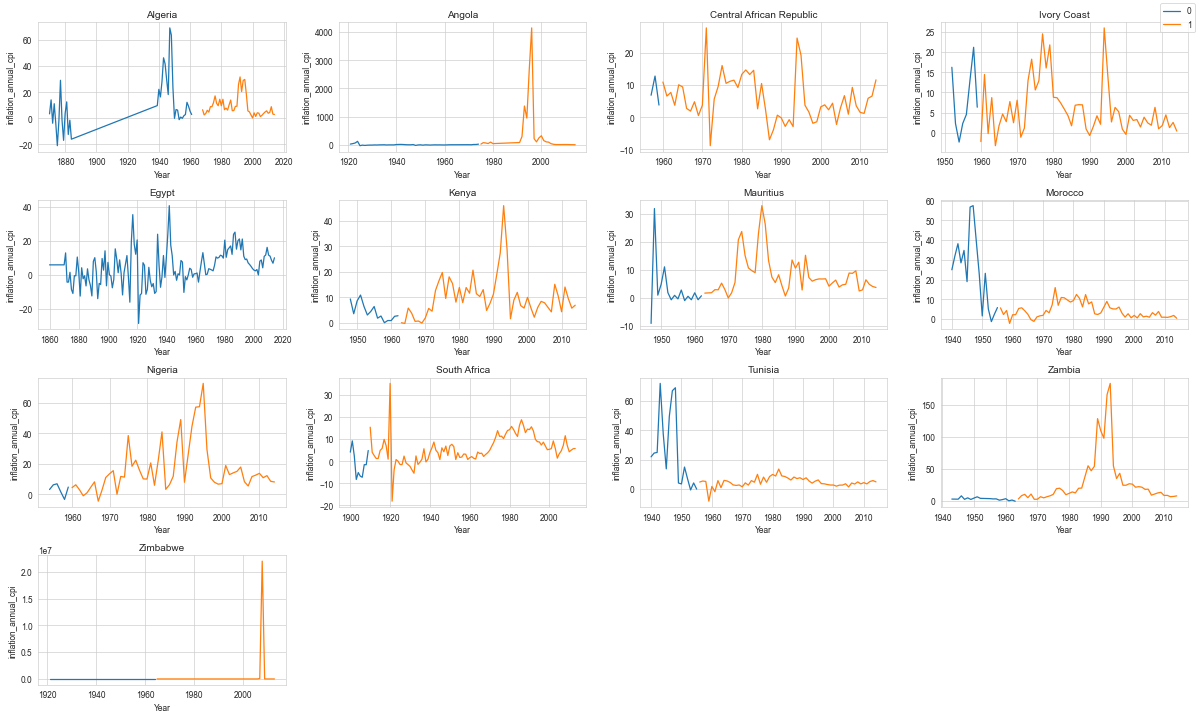

In [1966]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20,12), dpi= 60)
axes = axes.flatten()

for i, ax in zip(df['country'].unique(), axes):
  sns.lineplot(
      x = 'year', y = 'inflation_annual_cpi', 
      hue = 'independence', 
      data = df[df['country'] == i], 
      ax = ax
  )
  
  ax.set_xlabel('Year')
  ax.set_ylabel('inflation_annual_cpi')
  ax.set_title('{}'.format(i))
  ax.get_legend().remove()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=1)
fig.subplots_adjust(top=0.95)

for i in range(13,16):
  fig.delaxes(axes[i])

plt.tight_layout()


# Question 2: Which variables or factors are most associated with currency crises?

In [1330]:
countries = df["country"].unique()
print(countries)

['Algeria' 'Angola' 'Central African Republic' 'Ivory Coast' 'Egypt'
 'Kenya' 'Mauritius' 'Morocco' 'Nigeria' 'South Africa' 'Tunisia' 'Zambia'
 'Zimbabwe']


## Correlation between current crisis and other factors in general

In [1415]:
def corr_calculate(data):
    cm = data.iloc[:,4:].corr()
    return cm

In [1416]:
corr_general = corr_calculate(df)
corr_general

,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crisis,inflation_crisis,banking_crisis
systemic_crisis,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.121118,0.172562,0.853702
exch_usd,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.054823,-0.063783,0.168775
domestic_debt_in_default,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.211241,0.224429,0.225797
sovereign_external_debt_default,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.189717,0.187930,0.263992
gdp_weighted_default,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.015508,0.017630,0.026545
inflation_annual_cpi,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.080388,0.080060,0.098860
independence,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.084218,-0.022548,0.159620
currency_crisis,0.121118,-0.054823,0.211241,0.189717,0.015508,0.080388,0.084218,1.000000,0.398688,0.168000
inflation_crisis,0.172562,-0.063783,0.224429,0.187930,0.017630,0.080060,-0.022548,0.398688,1.000000,0.235852
banking_crisis,0.853702,0.168775,0.225797,0.263992,0.026545,0.098860,0.159620,0.168000,0.235852,1.000000


<AxesSubplot:>

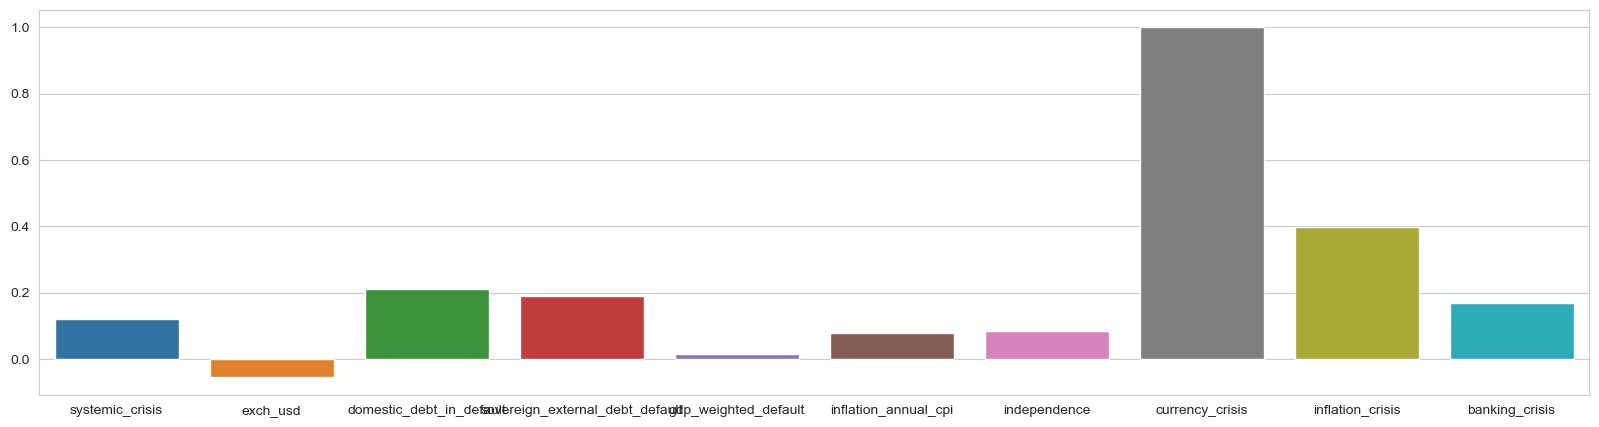

In [1417]:
sns.set_style('whitegrid')
plt.figure(figsize = (20,5))
sns.barplot(data = corr_general[7:8])

Text(0.5, 1.0, 'Heatmap of Correlation')

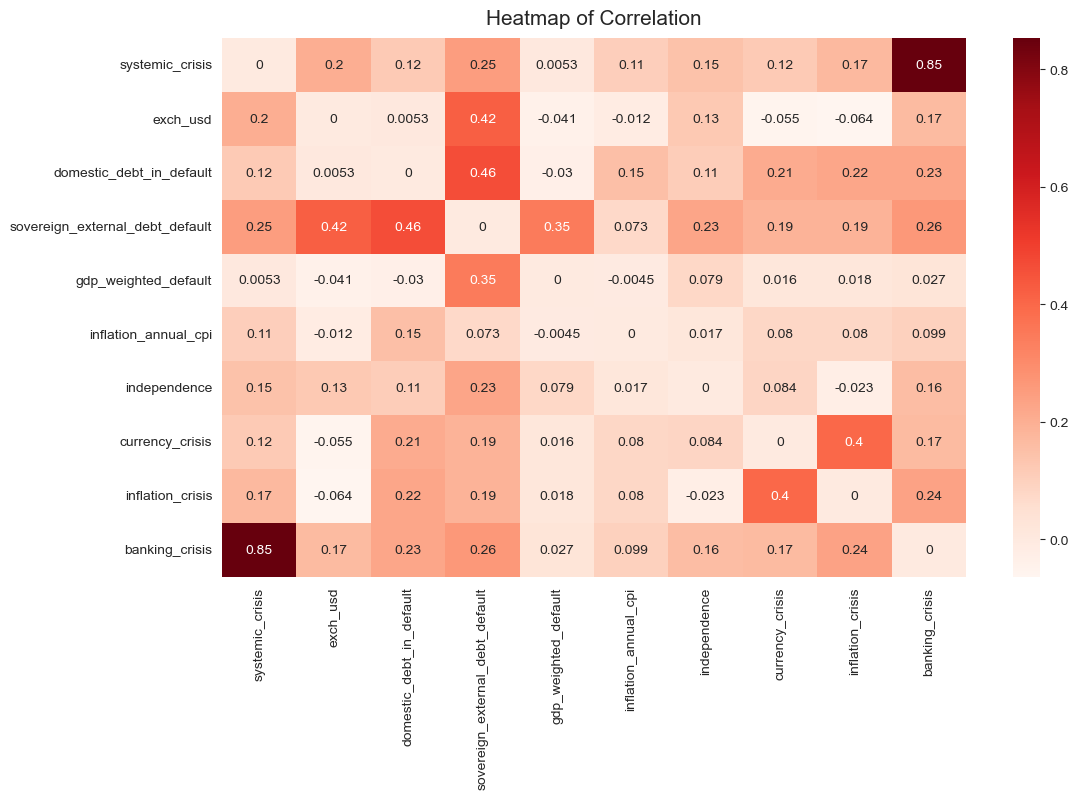

In [1418]:
corr_matrix = corr_general
corr_matrix.replace(1,0, inplace = True)
corr_matrix_sliced = corr_matrix[corr_matrix >=-9999]

plt.figure(figsize=(12,7))
heatmap_corr = sns.heatmap(corr_matrix_sliced, cmap="Reds", annot=True)
heatmap_corr.set_title("Heatmap of Correlation", fontdict={'fontsize':15}, pad=10)

In [1407]:
pears_r, p_val = stats.pearsonr(df['inflation_crisis'],df['currency_crisis'])
print(f"Pearson_r for inflation_crisis and currency_crisis: {pears_r.round(2)} \n")
print(f"p-value: {p_val}")

Pearson_r for inflation_crisis and currency_crisis: 0.4 

p-value: 1.1341794159781767e-41


In [1398]:
#Set up variable
y_currency_crisis = df["currency_crisis"]
x_factors = df.iloc[:, list(range(4, 11)) + list(range(12, 14))]
#Add constant to the model
x_factors = sm.add_constant(x_factors)

#Perfom logistic regression
model_linear = sm.OLS(y_currency_crisis, x_factors)
result_logis = model_linear.fit()

print(result_logis.summary())

                            OLS Regression Results                            
Dep. Variable:        currency_crisis   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     28.10
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           6.07e-44
Time:                        13:12:30   Log-Likelihood:                -228.75
No. Observations:                1059   AIC:                             477.5
Df Residuals:                    1049   BIC:                             527.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

<Figure size 1000x600 with 0 Axes>

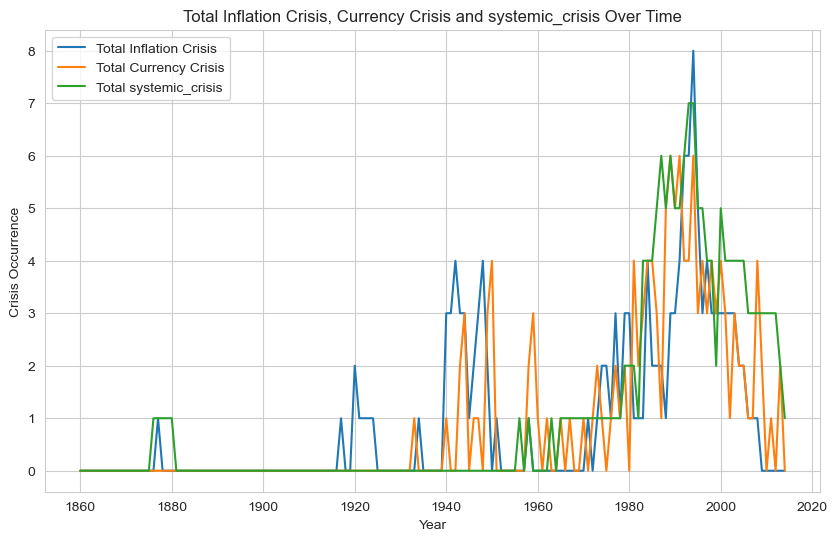

In [1943]:
plt.figure(figsize=(10,6))
df_grouped = df.groupby('year').agg({'inflation_crisis': 'sum', 'currency_crisis': 'sum', "sovereign_external_debt_default" : "sum"})

plt.figure(figsize=(10,6))
plt.plot(df_grouped.index, df_grouped['inflation_crisis'], label='Total Inflation Crisis')
plt.plot(df_grouped.index, df_grouped['currency_crisis'], label='Total Currency Crisis')
plt.plot(df_grouped.index, df_grouped['sovereign_external_debt_default'], label='Total systemic_crisis')

plt.xlabel('Year')
plt.ylabel('Crisis Occurrence')
plt.title('Total Inflation Crisis, Currency Crisis and systemic_crisis Over Time')
plt.legend(loc='upper left')
plt.show()

### - Base on correlation, we can see that domestic debt in default, and currency crisis has associated with currency crisis
### 

# Question 3: What is the relationship between CPI and inflation crises (if any)?

In [1252]:
#Set up variable
x_cpi = df["inflation_annual_cpi"]
y_inf_crisis = df["inflation_crisis"]

#Add constant to the model
x_cpi = sm.add_constant(x_cpi)

#Perfom logistic regression
model_logis = sm.Logit(y_inf_crisis, x_cpi)
result_logis = model_logis.fit()

print(result_logis.summary())

Optimization terminated successfully.
         Current function value: 0.071566
         Iterations 20
                           Logit Regression Results                           
Dep. Variable:       inflation_crisis   No. Observations:                 1059
Model:                          Logit   Df Residuals:                     1057
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.8142
Time:                        02:35:21   Log-Likelihood:                -75.789
converged:                       True   LL-Null:                       -407.91
Covariance Type:            nonrobust   LLR p-value:                1.789e-146
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.9710      0.866    -10.359      0.000     -10.668      -7.27

In [1419]:
#Set up variable
x_cpi = df["inflation_annual_cpi"]
y_inf_crisis = df["inflation_crisis"]

#Add constant to the model
x_cpi = sm.add_constant(x_cpi)

#Perfom logistic regression
model_logis = sm.OLS(y_inf_crisis, x_cpi)
result_logis = model_logis.fit()

print(result_logis.summary())

                            OLS Regression Results                            
Dep. Variable:       inflation_crisis   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.819
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00915
Time:                        14:43:43   Log-Likelihood:                -343.02
No. Observations:                1059   AIC:                             690.0
Df Residuals:                    1057   BIC:                             700.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1285 

In [ ]:
for i in countries:
    dt = df[df['country'] == i], 
    
    x_cpi = df["inflation_annual_cpi"]
    y_inf_crisis = df["inflation_crisis"]


### 1.The p-value is also less than 0.05, indicating that the variable CPI has a statistically significant relationship with the dependent variable Inflation crisis
###  2.The coefficient positive, suggesting that as the annual CPI inflation increases, the log-odds of having an inflation crisis also increase.

### => Positive relationship between CPI and Inflation crisis

# Question 4: Can you find an effective model (or models) for systemic crisis in terms of a selection of the given variables? How well does your model work in-sample versus out-of-sample?

In [1495]:
df.iloc[:,5:]

,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crisis,inflation_crisis,banking_crisis
0,0.052264,0,0,0.0,3.441456,0,0,0,1
1,0.052798,0,0,0.0,14.149140,0,0,0,0
2,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,0.051680,0,0,0.0,11.203897,0,0,0,0
4,0.051308,0,0,0.0,-3.848561,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1054,354.800000,1,1,0.0,-7.670000,1,1,0,1
1055,378.200000,1,1,0.0,3.217000,1,0,0,0
1056,361.900000,1,1,0.0,4.920000,1,0,0,0
1057,361.900000,1,1,0.0,3.720000,1,0,0,0


In [1759]:
y_systemic_crisis = df.iloc[:,4:5].values
y_systemic_crisis = y_systemic_crisis.ravel()
x_factors = df.iloc[:,5:].values


In [1593]:
n_iterations = 300
n_size = int(len(x_factors))
print(n_size)

1059


In [1996]:
from sklearn.linear_model import LogisticRegressionCV
y_systemic_crisis = df.iloc[:,4:5]
#y_systemic_crisis = y_systemic_crisis.ravel()
x_factors = df.iloc[:,5:]

X_resample, y_resample = resample(x_factors, y_systemic_crisis, n_samples = n_size)
x_train, x_test, y_train, y_test = train_test_split(X_resample,y_resample, test_size= 0.3)
model_logis_lasso = LogisticRegressionCV(cv=5, random_state=0,penalty='l1', solver='liblinear',max_iter=100000)

lasso = model_logis_lasso.fit(x_train, y_train)
coef = lasso.coef_[0]

mask = coef != 0
selected_features = x_factors.columns[mask]

#selec = {"Variable" : ['exch_usd', 'domestic_debt_in_default',
       #'sovereign_external_debt_default', 'gdp_weighted_default',
       #'inflation_annual_cpi', 'currency_crisis', 'inflation_crisis',
       #'banking_crisis'], "lasso" : lasso.coef_}

print('Selected features: ', selected_features )
print(lasso.coef_)


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selected features:  Index(['exch_usd', 'inflation_annual_cpi', 'banking_crisis'], dtype='object')
[[3.02339645e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.35238085e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.43746802e+00]]


In [1997]:
x_factors

,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crisis,inflation_crisis,banking_crisis
0,0.052264,0,0,0.0,3.441456,0,0,0,1
1,0.052798,0,0,0.0,14.149140,0,0,0,0
2,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,0.051680,0,0,0.0,11.203897,0,0,0,0
4,0.051308,0,0,0.0,-3.848561,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1054,354.800000,1,1,0.0,-7.670000,1,1,0,1
1055,378.200000,1,1,0.0,3.217000,1,0,0,0
1056,361.900000,1,1,0.0,4.920000,1,0,0,0
1057,361.900000,1,1,0.0,3.720000,1,0,0,0


In [1765]:
x_factors_lasso = df[["exch_usd", "inflation_annual_cpi","banking_crisis"]].values
y_systemic_crisis = df.iloc[:,4:5].values
y_systemic_crisis = y_systemic_crisis.ravel()

In [2004]:
data = {
    'Variable': ['exch_usd',
  'domestic_debt_in_default',
  'sovereign_external_debt_default',
  'gdp_weighted_default',
  'inflation_annual_cpi','independence'
  'currency_crisis',
  'inflation_crisis',
  'banking_crisis'],
    'Coefficient': [3.02339645e-03, 0.00000000e+00,  0.00000000e+00,
    0.00000000e+00, 6.35238085e-05,  0.00000000e+00,  0.00000000e+00,
   5.43746802e+00]
}

data = pd.DataFrame(data)
data

,Variable,Coefficient
0,exch_usd,0.003023
1,domestic_debt_in_default,0.000000
2,sovereign_external_debt_default,0.000000
3,gdp_weighted_default,0.000000
4,inflation_annual_cpi,0.000064
5,independencecurrency_crisis,0.000000
6,inflation_crisis,0.000000
7,banking_crisis,5.437468


## Logistic regression

In [1776]:
#Using boostrap to enhace the performance
    
mse_list_out = []
mse_list_in = []
for i in range(n_iterations):
    
    X_resample, y_resample = resample(x_factors, y_systemic_crisis, n_samples = n_size)
    x_train, x_test, y_train, y_test = train_test_split(X_resample,y_resample, test_size= 0.3)
    
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    
    model_logis = LogisticRegression(max_iter=1000)
    model_logis.fit(x_train,y_train)
    
    #In sample test
    y_in_logis = model_logis.predict(x_train)
    mse_in = accuracy_score(y_train, y_in_logis)
    mse_list_in.append(mse_in)
         
    #Out sample test
    y_out_logis = model_logis.predict(x_test)
    mse_out = accuracy_score(y_test, y_out_logis)
    mse_list_out.append(mse_out)
    
mse_array_in = np.array(mse_list_in)
mse_mean_in = np.mean(mse_array_in, axis=0)
mse_std_in = np.std(mse_array_in, axis=0) 

mse_array_out = np.array(mse_list_out)
mse_mean_out = np.mean(mse_array_out, axis=0)
mse_std_out = np.std(mse_array_out, axis=0)

print(mse_array)
print("Out sample accuracy_score: " + str(mse_mean_out))
print("In sample accuracy_score " + str(mse_mean_in))

print(model_logis.coef_)


[0.02201258 0.02201258 0.03144654 0.02201258 0.02830189 0.02201258
 0.02515723 0.03144654 0.03459119 0.03459119 0.02515723 0.02515723
 0.01886792 0.03144654 0.02201258 0.01572327 0.01886792 0.02830189
 0.04716981 0.02830189 0.02830189 0.01886792 0.02515723 0.03459119
 0.04402516 0.01572327 0.02515723 0.02515723 0.02830189 0.02515723
 0.01572327 0.0408805  0.01572327 0.02201258 0.01886792 0.02515723
 0.00943396 0.01572327 0.03459119 0.02201258 0.00943396 0.02515723
 0.02515723 0.03144654 0.01572327 0.02830189 0.03459119 0.01257862
 0.01572327 0.02515723 0.02201258 0.04716981 0.02515723 0.02201258
 0.03144654 0.02830189 0.01572327 0.01886792 0.01886792 0.01572327
 0.03459119 0.01257862 0.02830189 0.01886792 0.01572327 0.0408805
 0.03144654 0.02830189 0.01886792 0.03144654 0.02515723 0.02515723
 0.00314465 0.01886792 0.04716981 0.03144654 0.02201258 0.01257862
 0.03773585 0.01886792 0.01886792 0.02515723 0.01886792 0.01572327
 0.02515723 0.02201258 0.01886792 0.02201258 0.02515723 0.03459

In [1787]:
#Using boostrap to enhace the performance
    
mse_list_out = []
mse_list_in = []


for i in range(n_iterations):
    
    X_resample, y_resample = resample(x_factors_lasso, y_systemic_crisis, n_samples = n_size)
    x_train, x_test, y_train, y_test = train_test_split(X_resample,y_resample, test_size= 0.3)
    
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    
    model_logis = LogisticRegression(max_iter=1000)
    model_logis.fit(x_train,y_train)
    
    #In sample test
    y_in_logis = model_logis.predict(x_train)
    mse_in = accuracy_score(y_train, y_in_logis)
    mse_list_in.append(mse_in)
         
    #Out sample test
    y_out_logis = model_logis.predict(x_test)
    mse_out = accuracy_score(y_test, y_out_logis)
    mse_list_out.append(mse_out)
    
mse_array_in = np.array(mse_list_in)
mse_mean_in = np.mean(mse_array_in, axis=0)
mse_std_in = np.std(mse_array_in, axis=0) 

mse_array_out = np.array(mse_list_out)
mse_mean_out = np.mean(mse_array_out, axis=0)
mse_std_out = np.std(mse_array_out, axis=0)

print(mse_array)
print("Out sample accuracy_score| " + str(mse_mean_out))

print("In sample accuracy_score| " + str(mse_mean_in))   
print(model_logis.coef_)

[0.02201258 0.02201258 0.03144654 0.02201258 0.02830189 0.02201258
 0.02515723 0.03144654 0.03459119 0.03459119 0.02515723 0.02515723
 0.01886792 0.03144654 0.02201258 0.01572327 0.01886792 0.02830189
 0.04716981 0.02830189 0.02830189 0.01886792 0.02515723 0.03459119
 0.04402516 0.01572327 0.02515723 0.02515723 0.02830189 0.02515723
 0.01572327 0.0408805  0.01572327 0.02201258 0.01886792 0.02515723
 0.00943396 0.01572327 0.03459119 0.02201258 0.00943396 0.02515723
 0.02515723 0.03144654 0.01572327 0.02830189 0.03459119 0.01257862
 0.01572327 0.02515723 0.02201258 0.04716981 0.02515723 0.02201258
 0.03144654 0.02830189 0.01572327 0.01886792 0.01886792 0.01572327
 0.03459119 0.01257862 0.02830189 0.01886792 0.01572327 0.0408805
 0.03144654 0.02830189 0.01886792 0.03144654 0.02515723 0.02515723
 0.00314465 0.01886792 0.04716981 0.03144654 0.02201258 0.01257862
 0.03773585 0.01886792 0.01886792 0.02515723 0.01886792 0.01572327
 0.02515723 0.02201258 0.01886792 0.02201258 0.02515723 0.03459

pandas.core.frame.DataFrame

### Mixed selection procedures

# Question 5: What country conclusions (if any) do you draw from these data?

0.23691466857833857

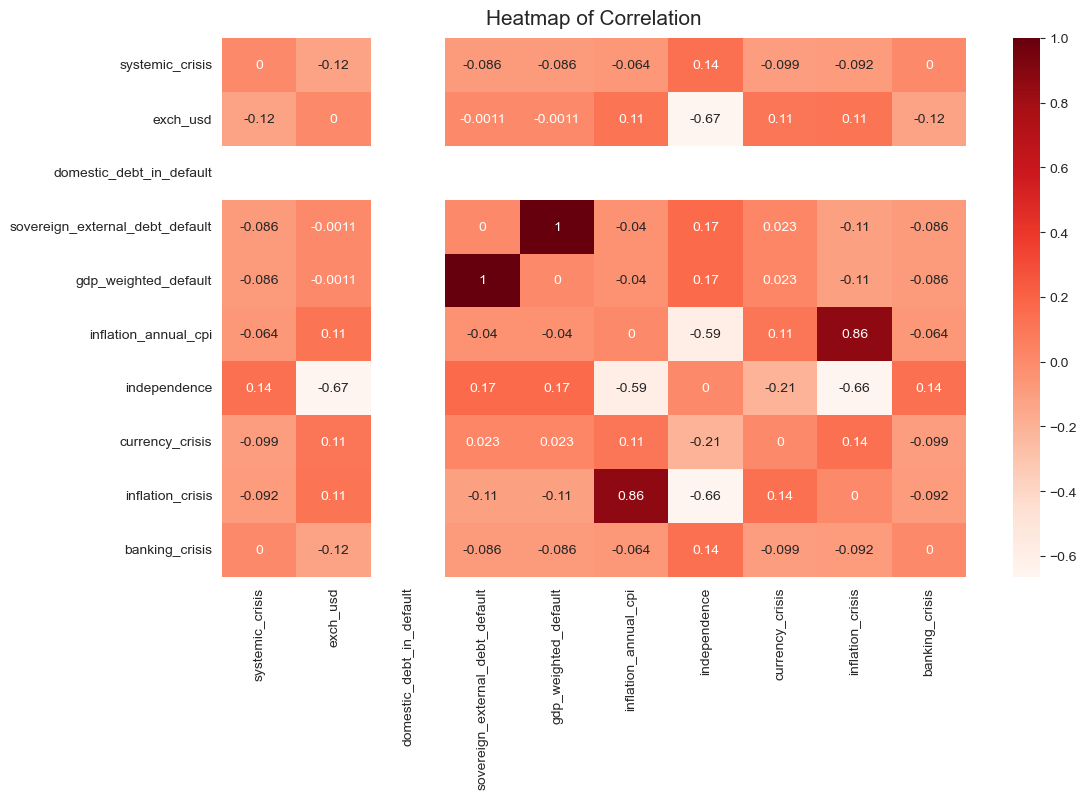

In [1798]:
tun_data = df[df["country"] == "Tunisia"]
tun_data

corr_tun = corr_calculate(tun_data)
corr_tun.replace(1,0, inplace = True)
corr_tun_sliced = corr_tun[corr_tun >=-9999]

plt.figure(figsize=(12,7))
heatmap_corr_tun = sns.heatmap(corr_tun_sliced, cmap="Reds", annot=True)
heatmap_corr_tun.set_title("Heatmap of Correlation", fontdict={'fontsize':15}, pad=10)

pears_r_tun, p_val_tun = stats.pearsonr(tun_data['inflation_crisis'],tun_data['currency_crisis'])
p_val_tun

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Angola'),
  Text(2, 0, 'Central African Republic'),
  Text(3, 0, 'Ivory Coast'),
  Text(4, 0, 'Egypt'),
  Text(5, 0, 'Kenya'),
  Text(6, 0, 'Mauritius'),
  Text(7, 0, 'Morocco'),
  Text(8, 0, 'Nigeria'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Tunisia'),
  Text(11, 0, 'Zambia'),
  Text(12, 0, 'Zimbabwe')])

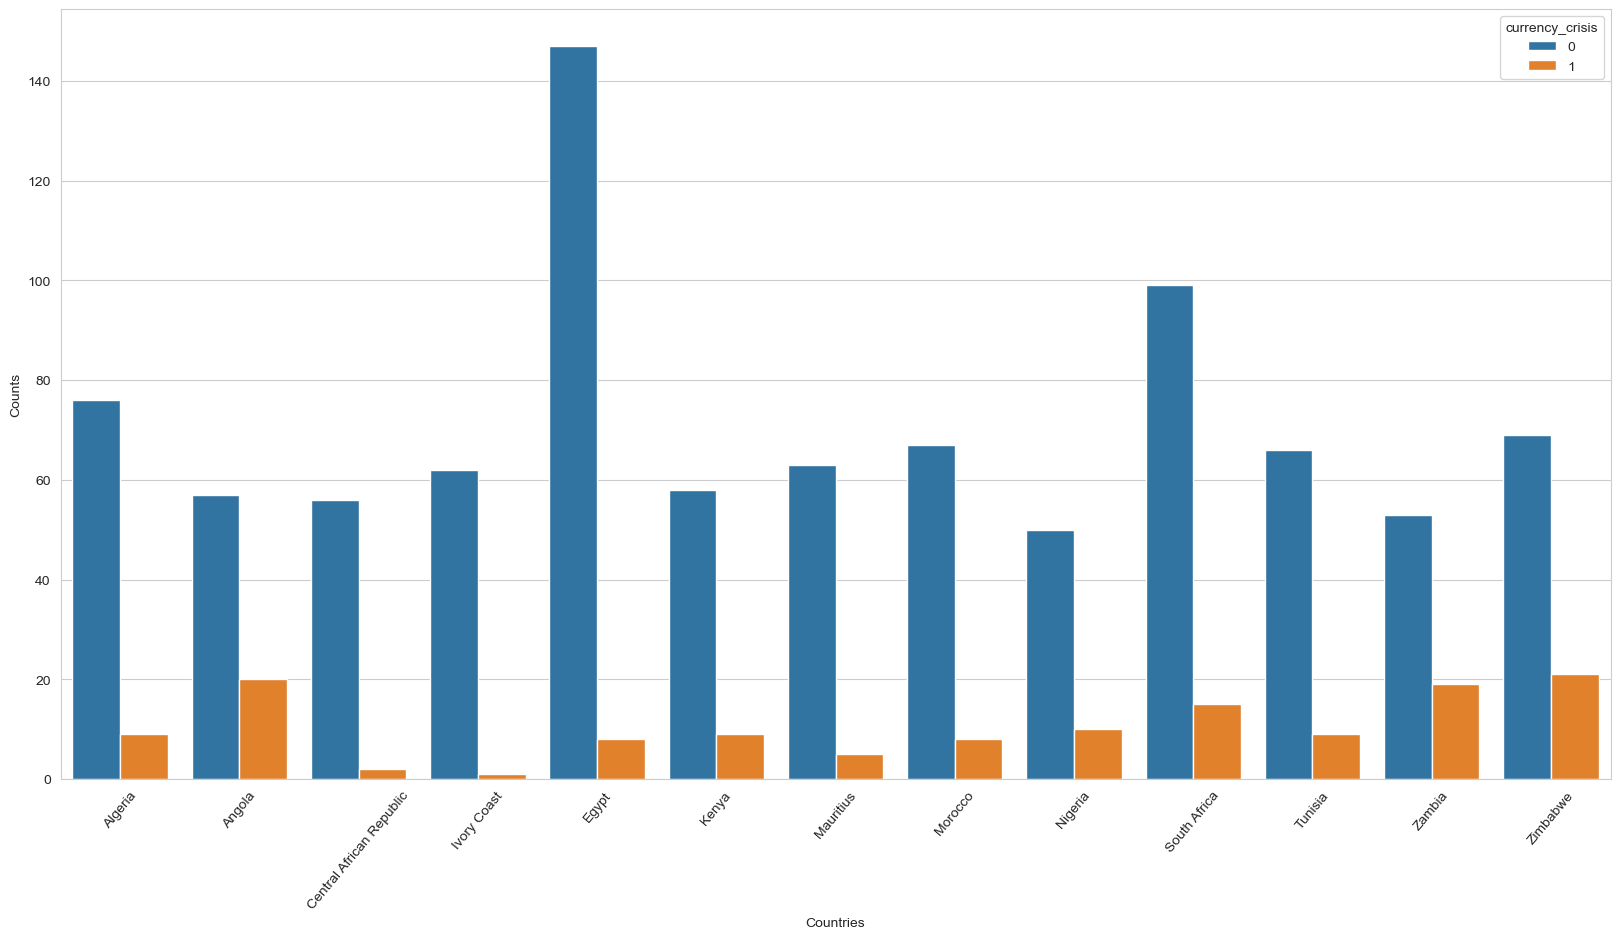

In [2031]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(x="country", hue="currency_crisis", data=df)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=50)

# Question 6: Derive a classification model for systemic crisis. How well does your model work in-sample versus out-of-sample?

In [1689]:
    model_LR = LogisticRegression(max_iter=1000)
    model_LR.fit(x_train, y_train)

    in_sample_preds = model_LR.predict(x_train)
    in_sample_accuracy = accuracy_score(y_train, in_sample_preds)
    print(f'In-sample Accuracy: {in_sample_accuracy}')

In-sample Accuracy: 0.9730094466936572


Model Name:  LogisticRegression(max_iter=1000)
In-sample Accuracy: 0.979757085020243
Out-of-sample Accuracy: 0.9779874213836478
Confusion matrix : 
 [[ 22   4]
 [  3 289]]
Outcome values : 
 22 4 3 289
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.85      0.86        26
           0       0.99      0.99      0.99       292

    accuracy                           0.98       318
   macro avg       0.93      0.92      0.93       318
weighted avg       0.98      0.98      0.98       318

Accuracy : 97.8 %
Precision : 88.0 %
Recall : 84.6 %
F1 Score : 0.863
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 91.8 %
MCC : MCC
roc_auc_score: 0.918


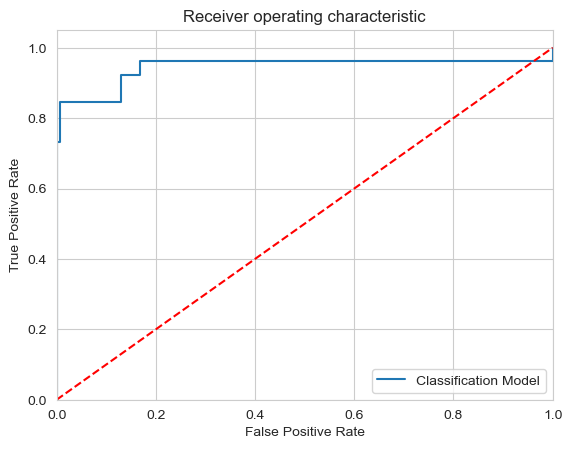

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
In-sample Accuracy: 1.0
Out-of-sample Accuracy: 0.9905660377358491
Confusion matrix : 
 [[ 24   2]
 [  1 291]]
Outcome values : 
 24 2 1 291
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.92      0.94        26
           0       0.99      1.00      0.99       292

    accuracy                           0.99       318
   macro avg       0.98      0.96      0.97       318
weighted avg       0.99      0.99      0.99       318

Accuracy : 99.1 %
Precision : 96.0 %
Recall : 92.3 %
F1 Score : 0.941
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 96.0 %
MCC : MCC
roc_auc_score: 0.96


/var/folders/y6/182wld891cn8s93gftsfv4nr0000gn/T/ipykernel_6296/3988596700.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_model, ignore_index=True)


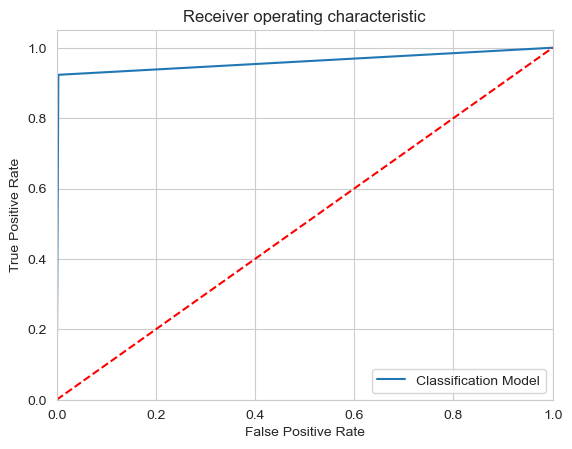

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier(n_estimators=10)
In-sample Accuracy: 0.9973009446693657
Out-of-sample Accuracy: 0.9937106918238994
Confusion matrix : 
 [[ 24   2]
 [  0 292]]
Outcome values : 
 24 2 0 292
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        26
           0       0.99      1.00      1.00       292

    accuracy                           0.99       318
   macro avg       1.00      0.96      0.98       318
weighted avg       0.99      0.99      0.99       318

Accuracy : 99.4 %
Precision : 100.0 %
Recall : 92.3 %
F1 Score : 0.96
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 96.2 %
MCC : MCC
roc_auc_score: 0.962


/var/folders/y6/182wld891cn8s93gftsfv4nr0000gn/T/ipykernel_6296/3988596700.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_model, ignore_index=True)


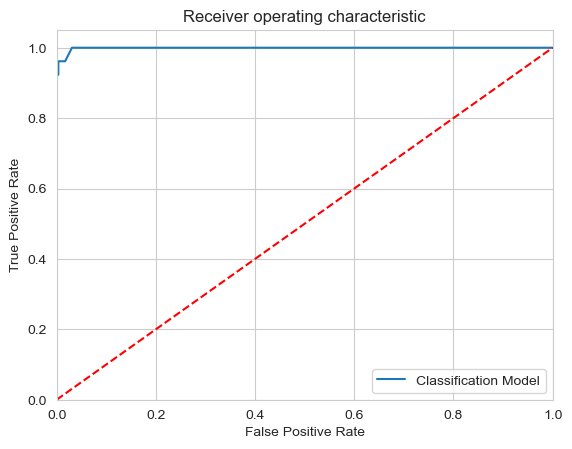

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
In-sample Accuracy: 0.9392712550607287
Out-of-sample Accuracy: 0.9339622641509434
Confusion matrix : 
 [[ 14  12]
 [  9 283]]
Outcome values : 
 14 12 9 283
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.54      0.57        26
           0       0.96      0.97      0.96       292

    accuracy                           0.93       318
   macro avg       0.78      0.75      0.77       318
weighted avg       0.93      0.93      0.93       318

Accuracy : 93.4 %
Precision : 60.9 %
Recall : 53.8 %
F1 Score : 0.571
Specificity or True Negative Rate : 96.9 %
Balanced Accuracy : 75.4 %
MCC : MCC
roc_auc_score: 0.754


/var/folders/y6/182wld891cn8s93gftsfv4nr0000gn/T/ipykernel_6296/3988596700.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_model, ignore_index=True)


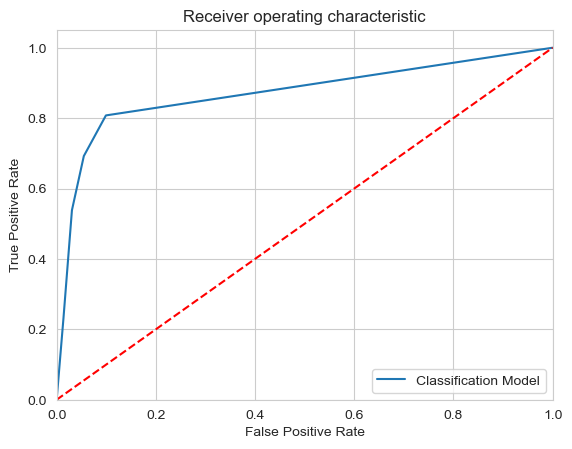

-----------------------------------------------------------------------------------------------------


/var/folders/y6/182wld891cn8s93gftsfv4nr0000gn/T/ipykernel_6296/3988596700.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_model, ignore_index=True)


Model Name:  SVC(probability=True)
In-sample Accuracy: 0.9190283400809717
Out-of-sample Accuracy: 0.9182389937106918
Confusion matrix : 
 [[  0  26]
 [  0 292]]
Outcome values : 
 0 26 0 292
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           0       0.92      1.00      0.96       292

    accuracy                           0.92       318
   macro avg       0.46      0.50      0.48       318
weighted avg       0.84      0.92      0.88       318

Accuracy : 91.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : MCC
roc_auc_score: 0.5


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var

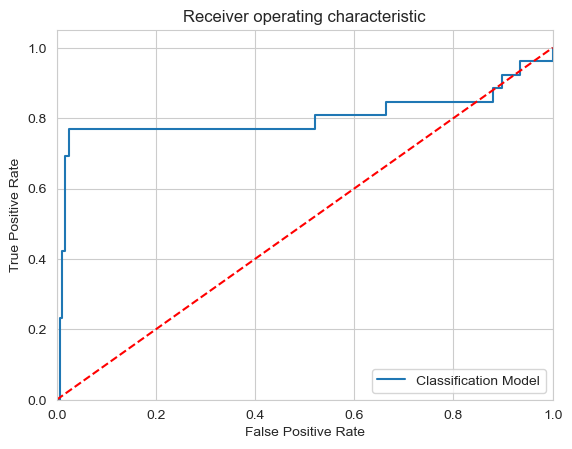

-----------------------------------------------------------------------------------------------------


/var/folders/y6/182wld891cn8s93gftsfv4nr0000gn/T/ipykernel_6296/3988596700.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_model, ignore_index=True)


Model Name:  BaggingClassifier(base_estimator=None, n_estimators=100)
In-sample Accuracy: 1.0
Out-of-sample Accuracy: 0.9937106918238994
Confusion matrix : 
 [[ 25   1]
 [  1 291]]
Outcome values : 
 25 1 1 291
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.96      0.96        26
           0       1.00      1.00      1.00       292

    accuracy                           0.99       318
   macro avg       0.98      0.98      0.98       318
weighted avg       0.99      0.99      0.99       318

Accuracy : 99.4 %
Precision : 96.2 %
Recall : 96.2 %
F1 Score : 0.962
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 98.0 %
MCC : MCC
roc_auc_score: 0.979


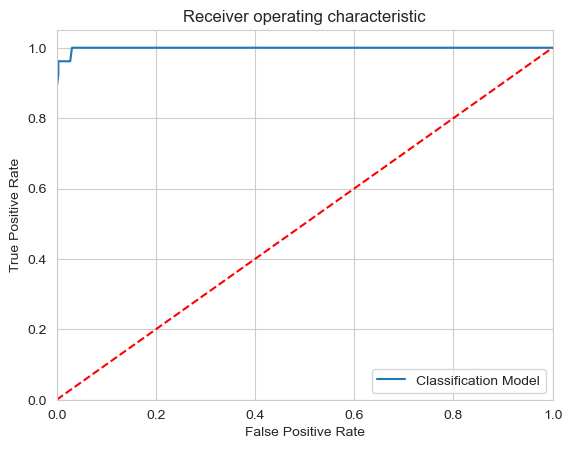

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
In-sample Accuracy: 0.9730094466936572
Out-of-sample Accuracy: 0.9716981132075472
Confusion matrix : 
 [[ 23   3]
 [  6 286]]
Outcome values : 
 23 3 6 286
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.88      0.84        26
           0       0.99      0.98      0.98       292

    accuracy                           0.97       318
   macro avg       0.89      0.93      0.91       318
weighted avg       0.97      0.97      0.97       318

Accuracy : 97.2 %
Precision : 79.3 %
Recall : 88.5 %
F1 Score : 0.836
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 93.2 %
MCC : MCC
roc_auc_score: 0.932


/var/folders/y6/182wld891cn8s93gftsfv4nr0000gn/T/ipykernel_6296/3988596700.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_model, ignore_index=True)


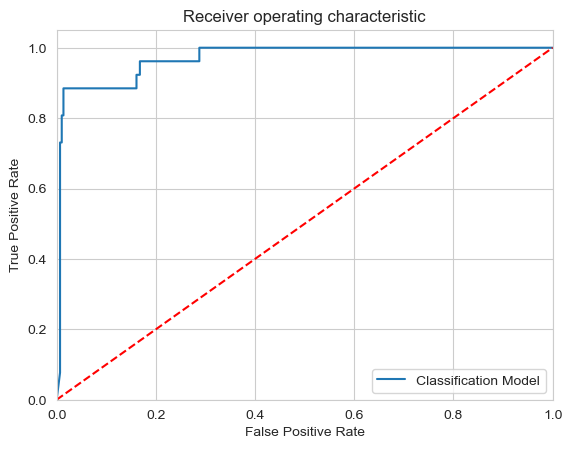

-----------------------------------------------------------------------------------------------------


/var/folders/y6/182wld891cn8s93gftsfv4nr0000gn/T/ipykernel_6296/3988596700.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_model, ignore_index=True)


In [1858]:
y_systemic_crisis = df.iloc[:,4:5].values
y_systemic_crisis = y_systemic_crisis.ravel()
x_factors = df[["exch_usd", "inflation_annual_cpi","banking_crisis"]].values

X_resample, y_resample = resample(x_factors, y_systemic_crisis, n_samples = n_size)
x_train, x_test, y_train, y_test = train_test_split(X_resample,y_resample, test_size= 0.3)


a={'Model Name':[],'In-sample Accuracy':[],'Out-of-sample Accuracy':[],'True Positive':[],'False Negative':[],'False Positive':[],'True Negative':[],'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[],'Specificity':[],'MCC':[],'ROC_AUC_Score':[],'Balanced Accuracy':[]}

result=pd.DataFrame(a)
result

model_LR = LogisticRegression(max_iter=1000)
model_DT = DecisionTreeClassifier()
model_RF = RandomForestClassifier(n_estimators = 10)
model_KN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model_SVM = SVC(probability=True)
model_BAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
model_Bayes = GaussianNB()

models_all = [model_LR, model_DT, model_RF,model_KN,model_SVM,model_BAG,model_Bayes]

for m in models_all:
    m.fit(x_train, y_train)
    
    y_pred = m.predict(x_test)
    y_pred_prob = m.predict_proba(x_test)
    
    print('Model Name: ', m)
    
    #Test performance
    in_sample_preds = m.predict(x_train)
    in_sample_accuracy = accuracy_score(y_train, in_sample_preds)
    print(f'In-sample Accuracy: {in_sample_accuracy}')

    out_of_sample_accuracy = accuracy_score(y_test, y_pred)
    print(f'Out-of-sample Accuracy: {out_of_sample_accuracy}')
    
    actual = y_test
    predicted = y_pred

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    print('Classification report : \n', C_Report)
   
    # calculating the metrics
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', 'MCC')
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, m.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
   #----------------------------------------------------------------------------------------------------------
    new_model = {'Out-of-sample Accuracy' : out_of_sample_accuracy,
                'In-sample Accuracy' : in_sample_accuracy,
                'Model Name' : m,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    result = result.append(new_model, ignore_index=True)
    

In [1845]:
result

,Model Name,In-sample Accuracy,Out-of-sample Accuracy,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(max_iter=1000),0.975709,0.993711,23.0,0.0,2.0,293.0,0.994,0.920,1.000,0.958,0.993,0.956,0.996610,0.996
1,DecisionTreeClassifier(),1.000000,0.984277,19.0,4.0,1.0,294.0,0.984,0.950,0.826,0.884,0.997,0.878,0.911349,0.912
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.987421,19.0,4.0,0.0,295.0,0.987,1.000,0.826,0.905,1.000,0.903,0.913043,0.913
3,KNeighborsClassifier(),0.948718,0.921384,3.0,20.0,5.0,290.0,0.921,0.375,0.130,0.194,0.983,0.188,0.556743,0.556
4,SVC(probability=True),0.932524,0.927673,0.0,23.0,0.0,295.0,0.928,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
5,(DecisionTreeClassifier(random_state=195033929...,1.000000,0.996855,22.0,1.0,0.0,295.0,0.997,1.000,0.957,0.978,1.000,0.976,0.978261,0.978
6,GaussianNB(),0.929825,0.927673,0.0,23.0,0.0,295.0,0.928,NaN,0.000,0.000,1.000,NaN,0.500000,0.500


In [1859]:
models={'models':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','SVC','BaggingClassifier','GaussianNB']}
out=pd.DataFrame(models)
out['Accuracy']=result['Accuracy']
out['Precision']=result['Precision']
out['Recall']=result['Recall']
out['F1 Score']=result['F1 Score']
out['True Positive']=result['True Positive']
out['False Negative']=result['False Negative']
out['False Positive']=result['False Positive']
out['True Negative']=result['True Negative']
out.sort_values(by=['Accuracy','F1 Score','Recall','Precision'],ascending=False,inplace=True)
out.reset_index(drop=True,inplace=True)
out

,models,Accuracy,Precision,Recall,F1 Score,True Positive,False Negative,False Positive,True Negative
0,BaggingClassifier,0.994,0.962,0.962,0.962,25.0,1.0,1.0,291.0
1,RandomForestClassifier,0.994,1.000,0.923,0.960,24.0,2.0,0.0,292.0
2,DecisionTreeClassifier,0.991,0.960,0.923,0.941,24.0,2.0,1.0,291.0
3,LogisticRegression,0.978,0.880,0.846,0.863,22.0,4.0,3.0,289.0
4,GaussianNB,0.972,0.793,0.885,0.836,23.0,3.0,6.0,286.0
5,KNeighborsClassifier,0.934,0.609,0.538,0.571,14.0,12.0,9.0,283.0
6,SVC,0.918,NaN,0.000,0.000,0.0,26.0,0.0,292.0


In [1898]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, recall_score, precision_score
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

y_systemic_crisis = df.iloc[:,4:5].values.ravel()
x_factors = df[["exch_usd", "inflation_annual_cpi","banking_crisis"]].values

model_LR = LogisticRegression(max_iter=1000)
model_DT = DecisionTreeClassifier()
model_RF = RandomForestClassifier(n_estimators = 10)
model_KN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model_SVM = SVC(probability=True)
model_BAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
model_Bayes = GaussianNB()

models_all = [model_LR, model_DT, model_RF,model_KN,model_SVM,model_BAG,model_Bayes]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest','KNeighbors','SVC','Bagging','Bayes']

criteria = ['Recall', 'F1 Score', 'Accuracy', 'Precision']

bootstrap_iteration = 100
model_scores = {name: {criterion: [] for criterion in criteria} for name in model_names}

for i in range(bootstrap_iteration):
    print(f"Bootstrap iteration: {i+1}")
    
    X_resample, y_resample = resample(x_factors, y_systemic_crisis, n_samples = len(x_factors))
    x_train, x_test, y_train, y_test = train_test_split(X_resample,y_resample, test_size= 0.3)
    
    for idx, model in enumerate(models_all):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        model_scores[model_names[idx]]['Recall'].append(recall_score(y_test, y_pred, average='macro'))
        model_scores[model_names[idx]]['F1 Score'].append(f1_score(y_test, y_pred, average='macro'))
        model_scores[model_names[idx]]['Accuracy'].append(accuracy_score(y_test, y_pred))
        model_scores[model_names[idx]]['Precision'].append(precision_score(y_test, y_pred, average='macro'))
    

result_df = pd.DataFrame()

for model_name, scores in model_scores.items():
    for criterion, score_list in scores.items():
        result_df.loc[model_name, criterion] = np.mean(score_list)

result_df.sort_values(by=['Recall','F1 Score','Accuracy','Precision'],ascending=False,inplace=True)


print("\nFinal Model Ranking:")
print(result_df)


Bootstrap iteration: 1


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bootstrap iteration: 2


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 3


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 4
Bootstrap iteration: 5
Bootstrap iteration: 6


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 7


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 8


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 9
Bootstrap iteration: 10


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bootstrap iteration: 11


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 12


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bootstrap iteration: 13
Bootstrap iteration: 14
Bootstrap iteration: 15


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 16


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 17


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bootstrap iteration: 18


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 19


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 20
Bootstrap iteration: 21
Bootstrap iteration: 22


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 23


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 24


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 25
Bootstrap iteration: 26


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 27


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 28


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 29


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 30


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 31


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set

Bootstrap iteration: 32


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 33


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bootstrap iteration: 34


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 35


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 36


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 37
Bootstrap iteration: 38


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 39
Bootstrap iteration: 40
Bootstrap iteration: 41


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 42


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documenta

Bootstrap iteration: 43
Bootstrap iteration: 44


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 45


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 46


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 47
Bootstrap iteration: 48


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 49


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 50


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 51


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 52
Bootstrap iteration: 53


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 54


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 55
Bootstrap iteration: 56


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 57


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 58


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 59


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 60
Bootstrap iteration: 61
Bootstrap iteration: 62


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 63


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bootstrap iteration: 64


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bootstrap iteration: 65
Bootstrap iteration: 66


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set

Bootstrap iteration: 67


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 68


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 69


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 70


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 71


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 72
Bootstrap iteration: 73
Bootstrap iteration: 74
Bootstrap iteration: 75
Bootstrap iteration: 76


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 77
Bootstrap iteration: 78


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 79


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 80


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 81


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bootstrap iteration: 82


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 83


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 84


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 85


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 86


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 87


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 88
Bootstrap iteration: 89
Bootstrap iteration: 90


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bootstrap iteration: 91


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 92
Bootstrap iteration: 93


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 94


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 95
Bootstrap iteration: 96
Bootstrap iteration: 97


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 98
Bootstrap iteration: 99


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bootstrap iteration: 100

Final Model Ranking:
                      Recall  F1 Score  Accuracy  Precision
Bagging             0.960610  0.960564  0.988270   0.962725
DecisionTree        0.958983  0.959141  0.987862   0.961344
RandomForest        0.949412  0.958210  0.987925   0.969513
LogisticRegression  0.905297  0.874844  0.936667   0.873251
Bayes               0.722447  0.707077  0.944245   0.766917
KNeighbors          0.622418  0.654007  0.921761   0.754444
SVC                 0.506872  0.492011  0.919088   0.587446


/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1941]:
y_systemic_crisis = df.iloc[:,4:5].values.ravel()
x_factors = df[["exch_usd", "inflation_annual_cpi","banking_crisis"]].values
x_train_bag, x_test_bag, y_train_bag, y_test_bag = train_test_split(x_factors,y_systemic_crisis, test_size= 0.3)

in_sample_pred_bag = model_BAG.predict(x_train_bag)
in_sample_accurancy_bag = accuracy_score(y_train_bag, in_sample_pred_bag)
print(f'In-sample Accuracy: {in_sample_accurancy_bag}')

out_sample_pred_bag = model_BAG.predict(x_test_bag)
out_of_sample_accuracy_bag = accuracy_score(y_test_bag, y_pred)
print(f'Out-of-sample Accuracy: {out_of_sample_accuracy_bag}')

In-sample Accuracy: 0.9851551956815114
Out-of-sample Accuracy: 0.8867924528301887
